In [1]:
#external packages
import numpy as np
import math as m
from astropy import units as u
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
from matplotlib.backends.backend_pdf import PdfPages
import sys
import random
%load_ext autoreload

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

sys.path.append('/home/almhatre/data')

In [36]:
import AGNclustering.kNN_functions as k
from AGNclustering.KNN_stuff import CDFkNN_rp_pi
from AGNclustering.kNN_error import kNN_ratio_error
from AGNclustering.utils import z_to_cdist
from AGNclustering.wppi_utils import control_mult_var,control_var

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
data_directory = '/home/almhatre/data/BASS/'
cat = Table.read(data_directory + 'data_dr2.csv',format='csv')
agnt =np.array(cat)
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
t = Table.read(data_directory +'2mrs_noAGN.csv',format='csv')
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN
agn.dtype.names

('col0',
 'bat_index',
 'Counterpart',
 'Type',
 'z',
 'Mbh',
 'Method',
 'Edd_rat',
 'L_edd',
 'L_bol',
 'NH',
 'L210',
 'ra',
 'dec',
 'L14195',
 'AGN',
 'flux',
 'Snu_1',
 'Snu_6',
 'Morphology',
 'log_Ms',
 'Lir_sf')

In [4]:
nonzero=agn['Mbh']!=0
agnmass=agn[nonzero]
zbins=np.arange(0.01,.11,.01)

stmin=np.min(agnmass['log_Ms'][agnmass['log_Ms']>8])
stmax=np.max(agnmass['log_Ms'][agnmass['log_Ms']>8])
increm=(stmax-stmin)/5
msbins=np.arange(stmin,stmax+increm,increm)

percentile=33


In [5]:
%autoreload 2

lower, mid, upper = control_mult_var(agn=agnmass,bins1=zbins,bins2=msbins,control1='z',control2='log_Ms',var='Mbh',percentile=percentile)

l, m, u = control_var(agn=agnmass,bins=zbins,control='z',var='Mbh',percentile=percentile)

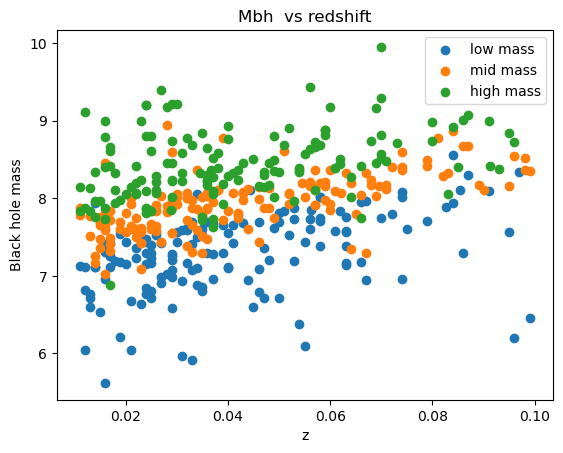

In [6]:
plt.scatter(lower['z'],lower['Mbh'],label='low mass')
plt.scatter(mid['z'],mid['Mbh'],label="mid mass")
plt.scatter(upper['z'],upper['Mbh'],label='high mass')
plt.xlabel('z')
plt.ylabel('Black hole mass')
plt.title('Mbh  vs redshift')
plt.legend()


In [278]:
# rs=np.arange(.5,40.5,.5)
# pis=np.arange(.5,40.5,.5)
rs=np.logspace(-1,np.log10(40),11)
pis=np.logspace(-1,np.log10(40),11)

print(rs)

t1=time.time()
output2,err2,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=2,rpbool=True)
output3,err3,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=3,rpbool=True)
output4,err4,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=4,rpbool=True)
output5,err5,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=5,rpbool=True)
output6,err6,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=6,rpbool=True)
output7,err7,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=7,rpbool=True)
output8,err8,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=8,rpbool=True)
output9,err9,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=9,rpbool=True)
output10,err10,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=2,m=10,rpbool=True)
t = time.time() - t1
print('took ',str(t/60),' minutes')


[ 0.1         0.18205642  0.3314454   0.60341763  1.09856054  2.
  3.64112841  6.62890803 12.06835267 21.97121087 40.        ]
using LCDM cosmology: Om0=.3, H0=70
Ngal 724 Nrand 38567 2
build tree 0.0005037784576416016
query 0.0068302154541015625
  kdtree tot 0.007375955581665039
cdf parallel 0.006986141204833984
  cdf 0.007335662841796875
Using  9  jacknife samples
1 / 9
using LCDM cosmology: Om0=.3, H0=70
Ngal 644 Nrand 35301 2
build tree 0.00047016143798828125
query 0.006231546401977539
  kdtree tot 0.006746053695678711
cdf parallel 0.006680965423583984
  cdf 0.007024049758911133
2 / 9
using LCDM cosmology: Om0=.3, H0=70
Ngal 610 Nrand 31976 2
build tree 0.0002791881561279297
query 0.005708932876586914
  kdtree tot 0.006031513214111328
cdf parallel 0.006888151168823242
  cdf 0.007234096527099609
3 / 9
using LCDM cosmology: Om0=.3, H0=70
Ngal 652 Nrand 35065 2
build tree 0.00040912628173828125
query 0.006695270538330078
  kdtree tot 0.0071527957916259766
cdf parallel 0.00691246986389

Ngal 680 Nrand 36787 2
build tree 0.0003814697265625
query 0.006369590759277344
  kdtree tot 0.006797313690185547
cdf parallel 0.00784754753112793
  cdf 0.008226633071899414
10 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 706 Nrand 37696 2
build tree 0.00044655799865722656
query 0.006602764129638672
  kdtree tot 0.007095813751220703
cdf parallel 0.007738351821899414
  cdf 0.008141040802001953
11 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 720 Nrand 38436 2
build tree 0.00032329559326171875
query 0.007112264633178711
  kdtree tot 0.007521629333496094
cdf parallel 0.008386373519897461
  cdf 0.008998870849609375
12 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 679 Nrand 35677 2
build tree 0.00047516822814941406
query 0.006006002426147461
  kdtree tot 0.006523609161376953
cdf parallel 0.007172107696533203
  cdf 0.007538318634033203
13 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 674 Nrand 35528 2
build tree 0.0003917217254638672
query 0.0060350894927978516
  kdtree tot 0.00646853446960

Ngal 697 Nrand 36955 2
build tree 0.00047016143798828125
query 0.006781816482543945
  kdtree tot 0.0072956085205078125
cdf parallel 0.0068819522857666016
  cdf 0.00723719596862793
21 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 697 Nrand 36581 2
build tree 0.00032329559326171875
query 0.006200313568115234
  kdtree tot 0.006575107574462891
cdf parallel 0.008318901062011719
  cdf 0.008714437484741211
22 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 684 Nrand 36303 2
build tree 0.0003371238708496094
query 0.0063631534576416016
  kdtree tot 0.006742238998413086
cdf parallel 0.00751948356628418
  cdf 0.007916450500488281
23 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 702 Nrand 37359 2
build tree 0.00047850608825683594
query 0.006690263748168945
  kdtree tot 0.007216215133666992
cdf parallel 0.007207155227661133
  cdf 0.007564544677734375
24 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 717 Nrand 38246 2
build tree 0.00034999847412109375
query 0.006858110427856445
  kdtree tot 0.007264137

Ngal 701 Nrand 37524 2
build tree 0.00030303001403808594
query 0.006711483001708984
  kdtree tot 0.007060050964355469
cdf parallel 0.0073850154876708984
  cdf 0.007756471633911133
21 / 49
using LCDM cosmology: Om0=.3, H0=70
Ngal 718 Nrand 38344 2
build tree 0.0003991127014160156
query 0.0064122676849365234
  kdtree tot 0.0068666934967041016
cdf parallel 0.007211208343505859
  cdf 0.007551908493041992
22 / 49
using LCDM cosmology: Om0=.3, H0=70
Ngal 723 Nrand 38474 2
build tree 0.0004603862762451172
query 0.007105827331542969
  kdtree tot 0.007611989974975586
cdf parallel 0.007931232452392578
  cdf 0.008316278457641602
23 / 49
using LCDM cosmology: Om0=.3, H0=70
Ngal 708 Nrand 37824 2
build tree 0.0003814697265625
query 0.006551504135131836
  kdtree tot 0.0069828033447265625
cdf parallel 0.007892370223999023
  cdf 0.008234262466430664
24 / 49
using LCDM cosmology: Om0=.3, H0=70
Ngal 700 Nrand 36885 2
build tree 0.0004923343658447266
query 0.006550312042236328
  kdtree tot 0.007084608078

Ngal 711 Nrand 38210 2
build tree 0.0003790855407714844
query 0.00690770149230957
  kdtree tot 0.007328510284423828
cdf parallel 0.007901430130004883
  cdf 0.0082855224609375
8 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 721 Nrand 38488 2
build tree 0.0003771781921386719
query 0.006930828094482422
  kdtree tot 0.007354021072387695
cdf parallel 0.008205652236938477
  cdf 0.008611917495727539
9 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 720 Nrand 38393 2
build tree 0.00038623809814453125
query 0.006994962692260742
  kdtree tot 0.007425546646118164
cdf parallel 0.0075948238372802734
  cdf 0.007967948913574219
10 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 710 Nrand 37951 2
build tree 0.00039076805114746094
query 0.006705760955810547
  kdtree tot 0.007148027420043945
cdf parallel 0.0073206424713134766
  cdf 0.007699251174926758
11 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 702 Nrand 37914 2
build tree 0.00032138824462890625
query 0.006104469299316406
  kdtree tot 0.00646948814392

Ngal 710 Nrand 37734 2
build tree 0.00039386749267578125
query 0.006956338882446289
  kdtree tot 0.007398843765258789
cdf parallel 0.007404804229736328
  cdf 0.0077817440032958984
45 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 707 Nrand 37497 2
build tree 0.00040340423583984375
query 0.006816387176513672
  kdtree tot 0.007279634475708008
cdf parallel 0.008224725723266602
  cdf 0.008794546127319336
46 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 713 Nrand 37585 2
build tree 0.0004222393035888672
query 0.006702899932861328
  kdtree tot 0.0071849822998046875
cdf parallel 0.008646726608276367
  cdf 0.009251832962036133
47 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 715 Nrand 37995 2
build tree 0.0005056858062744141
query 0.007203817367553711
  kdtree tot 0.007773876190185547
cdf parallel 0.008321762084960938
  cdf 0.008727312088012695
48 / 64
using LCDM cosmology: Om0=.3, H0=70
Ngal 718 Nrand 38355 2
build tree 0.00045013427734375
query 0.007376194000244141
  kdtree tot 0.007871866226

Ngal 710 Nrand 37594 2
build tree 0.0005285739898681641
query 0.006873369216918945
  kdtree tot 0.007448434829711914
cdf parallel 0.007728099822998047
  cdf 0.008105754852294922
17 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 717 Nrand 38460 2
build tree 0.000396728515625
query 0.006311178207397461
  kdtree tot 0.006750583648681641
cdf parallel 0.0077037811279296875
  cdf 0.008101940155029297
18 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 724 Nrand 38467 2
build tree 0.00035452842712402344
query 0.00628662109375
  kdtree tot 0.006684303283691406
cdf parallel 0.007265806198120117
  cdf 0.007628679275512695
19 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 723 Nrand 38430 2
build tree 0.0004076957702636719
query 0.006644010543823242
  kdtree tot 0.007093191146850586
cdf parallel 0.00725245475769043
  cdf 0.007598400115966797
20 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 720 Nrand 38078 2
build tree 0.0004253387451171875
query 0.007045269012451172
  kdtree tot 0.00751042366027832
cdf

Ngal 715 Nrand 38311 2
build tree 0.0004069805145263672
query 0.006362438201904297
  kdtree tot 0.0068149566650390625
cdf parallel 0.0075130462646484375
  cdf 0.007864952087402344
54 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 723 Nrand 38442 2
build tree 0.0004956722259521484
query 0.00666046142578125
  kdtree tot 0.007196903228759766
cdf parallel 0.007186174392700195
  cdf 0.007546663284301758
55 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 723 Nrand 38410 2
build tree 0.0004010200500488281
query 0.007093906402587891
  kdtree tot 0.0075359344482421875
cdf parallel 0.007308244705200195
  cdf 0.007691383361816406
56 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 717 Nrand 38150 2
build tree 0.0002911090850830078
query 0.006690502166748047
  kdtree tot 0.007029533386230469
cdf parallel 0.007718801498413086
  cdf 0.00824880599975586
57 / 81
using LCDM cosmology: Om0=.3, H0=70
Ngal 719 Nrand 38422 2
build tree 0.0003948211669921875
query 0.006844997406005859
  kdtree tot 0.0072817802429

Ngal 714 Nrand 38079 2
build tree 0.00038814544677734375
query 0.006383180618286133
  kdtree tot 0.006814241409301758
cdf parallel 0.006989717483520508
  cdf 0.0073816776275634766
9 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 720 Nrand 38546 2
build tree 0.00037980079650878906
query 0.007508516311645508
  kdtree tot 0.007955551147460938
cdf parallel 0.008040904998779297
  cdf 0.008604288101196289
10 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 723 Nrand 38519 2
build tree 0.0002970695495605469
query 0.0066945552825927734
  kdtree tot 0.007036447525024414
cdf parallel 0.007714509963989258
  cdf 0.008095502853393555
11 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 723 Nrand 38478 2
build tree 0.0004019737243652344
query 0.0066144466400146484
  kdtree tot 0.007067441940307617
cdf parallel 0.007803201675415039
  cdf 0.008176565170288086
12 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 715 Nrand 38289 2
build tree 0.0003693103790283203
query 0.00630497932434082
  kdtree tot 0.0067150

Ngal 713 Nrand 37709 2
build tree 0.0004374980926513672
query 0.006841421127319336
  kdtree tot 0.007330179214477539
cdf parallel 0.007797718048095703
  cdf 0.00820159912109375
46 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 711 Nrand 37880 2
build tree 0.00045561790466308594
query 0.006496906280517578
  kdtree tot 0.006993532180786133
cdf parallel 0.007239818572998047
  cdf 0.00760960578918457
47 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 715 Nrand 37803 2
build tree 0.00041413307189941406
query 0.006877422332763672
  kdtree tot 0.007338047027587891
cdf parallel 0.007955789566040039
  cdf 0.008343696594238281
48 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 713 Nrand 38142 2
build tree 0.0005459785461425781
query 0.006830453872680664
  kdtree tot 0.007445335388183594
cdf parallel 0.008054256439208984
  cdf 0.008632183074951172
49 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 714 Nrand 38278 2
build tree 0.00030541419982910156
query 0.006630659103393555
  kdtree tot 0.006979227

Ngal 720 Nrand 38218 2
build tree 0.0003497600555419922
query 0.00654911994934082
  kdtree tot 0.006947517395019531
cdf parallel 0.0076313018798828125
  cdf 0.008002996444702148
83 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 718 Nrand 37900 2
build tree 0.0003783702850341797
query 0.006270408630371094
  kdtree tot 0.0066945552825927734
cdf parallel 0.007393360137939453
  cdf 0.007748126983642578
84 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 717 Nrand 37865 2
build tree 0.0004432201385498047
query 0.006301164627075195
  kdtree tot 0.0067861080169677734
cdf parallel 0.006849527359008789
  cdf 0.007210969924926758
85 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 716 Nrand 38088 2
build tree 0.0004119873046875
query 0.006520271301269531
  kdtree tot 0.006974935531616211
cdf parallel 0.007578372955322266
  cdf 0.008038997650146484
86 / 100
using LCDM cosmology: Om0=.3, H0=70
Ngal 720 Nrand 38142 2
build tree 0.00029921531677246094
query 0.0061800479888916016
  kdtree tot 0.006523370

[0.00231458 0.00598978 0.00512185 0.00601791 0.00543844 0.00461037
 0.00575222 0.00548355 0.00479848]


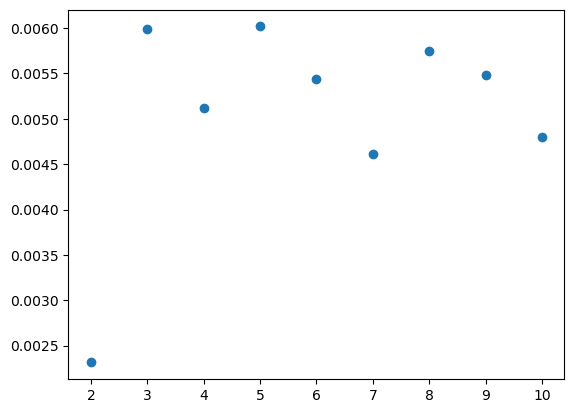

In [301]:
ms=np.arange(2,11,1)
errors=np.empty(0)
errors =np.append(errors,(err2[0][4]))
errors = np.append(errors,(err3[0][4]))
errors = np.append(errors,(err4[0][4]))
errors = np.append(errors,(err5[0][4]))
errors = np.append(errors,(err6[0][4]))
errors = np.append(errors,(err7[0][4]))
errors = np.append(errors,(err8[0][4]))
errors = np.append(errors,(err9[0][4]))
errors = np.append(errors,(err10[0][4]))
# plt.ylim(0,0.003)
print(errors)
plt.scatter(ms,errors)

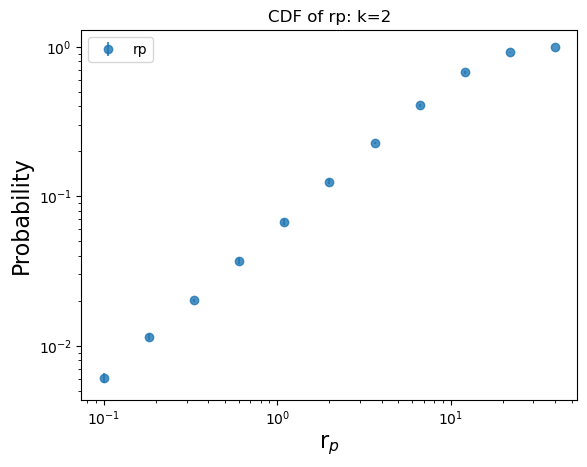

In [277]:
n=np.array([output2[i][-1] for i in np.arange(len(output2))])

plt.errorbar(rs,n2[1],yerr=err2[1],fmt='o',label='rp',alpha=0.8)
plt.xlabel('r$_{p}$',fontsize=16)

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Probability',fontsize=16)
plt.title('CDF of rp: k=2')
plt.legend()

In [265]:
t1=time.time()
outputlow,errlow,cov = k.kNN_wrapper(rs,pis, l, gal,kneighbors=5,m=5,rpbool=True)
t = time.time() - t1
print('took ',str(t/60),' minutes')

using LCDM cosmology: Om0=.3, H0=70
Ngal 211 Nrand 38567 5
build tree 0.0005083084106445312
query 0.008614540100097656
  kdtree tot 0.009163856506347656
cdf parallel 0.01158595085144043
  cdf 0.011989831924438477
Using  25  jacknife samples
1 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 208 Nrand 37881 5
build tree 0.0004191398620605469
query 0.008224248886108398
  kdtree tot 0.008681774139404297
cdf parallel 0.010038614273071289
  cdf 0.010442256927490234
2 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 198 Nrand 36919 5
build tree 0.00035262107849121094
query 0.007863998413085938
  kdtree tot 0.008260726928710938
cdf parallel 0.01064920425415039
  cdf 0.011056184768676758
3 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 195 Nrand 35105 5
build tree 0.00038123130798339844
query 0.0070645809173583984
  kdtree tot 0.007485866546630859
cdf parallel 0.01044464111328125
  cdf 0.010881662368774414
4 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 199 Nrand 35700 5
build tree 0.0003898143768310

In [266]:
outputhigh, errhigh, cov = k.kNN_wrapper(rs,pis, u, gal, kneighbors=5, m=5, rpbool=True)

using LCDM cosmology: Om0=.3, H0=70
Ngal 212 Nrand 38567 5
build tree 0.0002684593200683594
query 0.008437633514404297
  kdtree tot 0.008756160736083984
cdf parallel 0.010756492614746094
  cdf 0.011164426803588867
Using  25  jacknife samples
1 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 209 Nrand 37881 5
build tree 0.00026297569274902344
query 0.008212804794311523
  kdtree tot 0.008515596389770508
cdf parallel 0.010285615921020508
  cdf 0.010680913925170898
2 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 194 Nrand 36919 5
build tree 0.0004210472106933594
query 0.008483648300170898
  kdtree tot 0.008951187133789062
cdf parallel 0.01090383529663086
  cdf 0.011307239532470703
3 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 194 Nrand 35105 5
build tree 0.00031495094299316406
query 0.0070493221282958984
  kdtree tot 0.007406711578369141
cdf parallel 0.010269880294799805
  cdf 0.010704755783081055
4 / 25
using LCDM cosmology: Om0=.3, H0=70
Ngal 201 Nrand 35700 5
build tree 0.00050354003906

In [267]:

n1=output[0]
n2=output[1]
n3=output[2] 
n1low=np.array([outputlow[i][-1] for i in np.arange(len(outputlow))])
n1high=np.array([outputhigh[i][-1] for i in np.arange(len(outputhigh))])

# For kNN(pi)
n1pilow = np.empty(len(rs))
n1pihigh = np.empty(len(rs))
for i in range(len(outputlow)):
#     print(np.array([row[-1] for row in outputlow[i]]))
    n1pilow = np.vstack((n1pilow,np.array([row[-1] for row in outputlow[i]])))
    n1pihigh = np.vstack((n1pihigh,np.array([row[-1] for row in outputhigh[i]])))
n1pilow = n1pilow[1:]
n1pihigh = n1pihigh[1:]


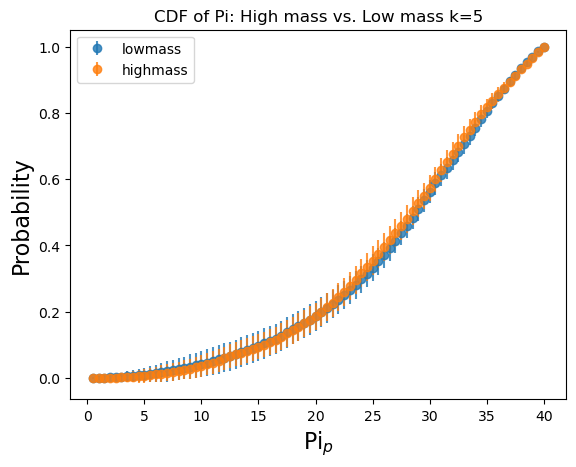

In [269]:
# plt.errorbar(rs,n1low[3],yerr=errlow[3],fmt='o',label='lowmass',alpha=0.8)
# plt.errorbar(rs,n1high[3],yerr=errhigh[3],fmt='o',label='highmass',alpha=0.8)
# plt.xlabel('r$_{p}$',fontsize=16)

plt.errorbar(rs,n1pilow[4],yerr=errlow[4],fmt='o',label='lowmass',alpha=0.8)
plt.errorbar(rs,n1pihigh[4],yerr=errhigh[4],fmt='o',label='highmass',alpha=0.8)
plt.xlabel('Pi$_{p}$',fontsize=16)

# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Probability',fontsize=16)
plt.title('CDF of Pi: High mass vs. Low mass k=5')
plt.legend()

In [270]:
ratioerr = kNN_ratio_error(n1high,n1low,errhigh,errlow)


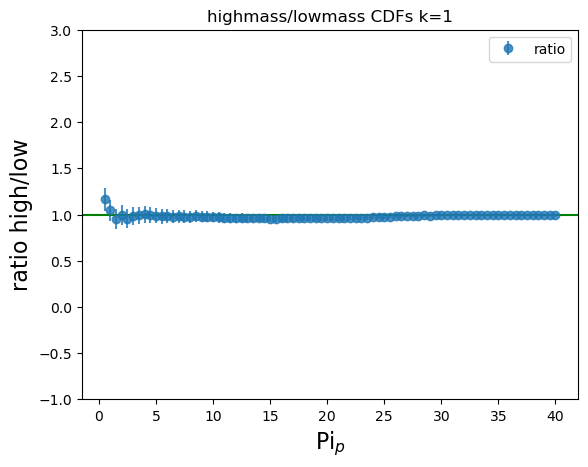

In [272]:
nonzero=np.array([n1low != 0])[0]
nonzero=nonzero[0]

plt.errorbar(rs[nonzero],n1pihigh[0][nonzero]/n1pilow[0][nonzero],yerr=ratioerr[0][nonzero],fmt='o',label='ratio',alpha=0.8)
# plt.xscale('log')
plt.ylabel('ratio high/low',fontsize=16)
plt.title('highmass/lowmass CDFs k=1')
plt.xlabel('Pi$_{p}$',fontsize=16)
plt.ylim([-1,3])
plt.axhline(1,color='g')
plt.legend()
